## Прогнозирование: подпишется ли клиент на срочный депозит у банка


### Описание задачи

В результате маркетинговой кампании одного из банков была собрана база данных о клиентах (32950 записей). Банк хочет сосредоточить усилия на потенциальных клиентах с долгосрочными вкладами, поэтому цель задачи - предсказать, оформит ли клиент такой вклад.

### Признаки


|  Признак  | Тип | Описание  | 
| ------------- | ------------- | ------------- | 
| age  | числовой  | возраст человека  |
| job  | категориальный  | тип работы  |
| marital  | категориальный | семейное положение |
| education  | категориальный | образование  |
| default | категориальный | возможность платы по кредиту  |
| housing  | категориальный  | наличие жилищного кредита  |
| loan | категориальный  | наличие личного заема  |
| contact  | категориальный  | вид связи |
| month | категориальный | месяц последнего контакта в году  |
| dayofweek  | категориальный | день недели последнего контакта  |
| duration | числовой  | продолжительность последнего контакта в секундах  |
| campaign | числовой  | количество контактов во время кампании  |
| pdays  | числовой  | количество дней, прошедших после того, как с клиентом в последний раз связались из предыдущей кампании  |
| previous  | числовой  | количество контактов, выполненных до этой кампании и для этого клиента  |
| poutcome  | категориальный | результат предыдущей маркетинговой кампании  |
| y  | бинарный | оформил ли клиент вклад  |

### Чтение данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np          
import seaborn as sns         
import sklearn                  
data = pd.read_csv("https://raw.githubusercontent.com/AndreyLev/ML-Labs/main/new_train.csv")

Убираем предупреждения, чтобы не мешали. 

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Размеры датасета

In [4]:
data.shape


(32950, 16)

Одна строка - один клиент. Один столбец - один признак.
Взглянем на 10 первых и последних строк набора данных:

In [5]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [6]:
data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32940,30,management,married,university.degree,no,no,yes,cellular,jul,mon,833,5,999,0,nonexistent,no
32941,28,blue-collar,single,basic.9y,no,yes,no,cellular,apr,thu,315,1,2,1,success,yes
32942,44,entrepreneur,married,professional.course,no,yes,no,telephone,nov,mon,291,3,999,0,nonexistent,no
32943,47,admin.,married,basic.9y,no,yes,no,telephone,nov,fri,64,3,999,0,nonexistent,no
32944,29,blue-collar,married,basic.6y,no,no,no,cellular,may,thu,16,7,999,0,nonexistent,no
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


Взглянем на более подробную информацию о наборе данных:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


**В наборе данных нет пропущенных значений**

Некоторые признаки являются *категориальными*, но имеют типы *object* или *int64*, поэтому необходимо привести соответствующие столбцы к типу *category*

In [8]:
categorical_indices = list(range(1,10)) + [14]
data.iloc[:,categorical_indices]=data.iloc[:,categorical_indices].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  category
 2   marital      32950 non-null  category
 3   education    32950 non-null  category
 4   default      32950 non-null  category
 5   housing      32950 non-null  category
 6   loan         32950 non-null  category
 7   contact      32950 non-null  category
 8   month        32950 non-null  category
 9   day_of_week  32950 non-null  category
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  category
 15  y            32950 non-null  object  
dtypes: category(10), int64(5), object(1)
memory usage: 1.8+ MB


## Вычисление основных характеристик и визуализация данных

Получим сводную информацию о количественных признаках:

In [10]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Теперь получим сводную информацию о категориальных признаках:

In [11]:
data.describe(include = ['category'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416


Вычислим корреляционную матрицу.

In [12]:
corr_matrix = data.corr()
corr_matrix

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


Визуализируем её. Чем светлее ячейка, тем сильнее корреляция.

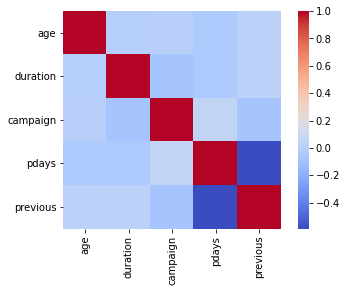

In [13]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

In [14]:
corr_matrix > 0.3

,age,duration,campaign,pdays,previous
age,True,False,False,False,False
duration,False,True,False,False,False
campaign,False,False,True,False,False
pdays,False,False,False,True,False
previous,False,False,False,False,True


#### Как мы видим, между показателями довольно слабые связи.

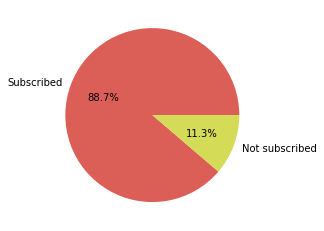

In [15]:
plt.pie(data.y.value_counts(), labels = ["Subscribed", "Not subscribed"], colors = sns.color_palette("hls"), autopct = '%1.1f%%')
pass

#### Как мы видим, выборка является несбалансированной

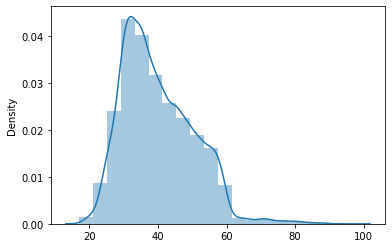

In [16]:
sns.distplot(data['age'].values, bins=20)
pass

В нашем наборе данных находятся люди в основном от 20 до 60 лет. Это говорит о том, что банк намерен работать с людьми, которые работают и платежеспособны. 

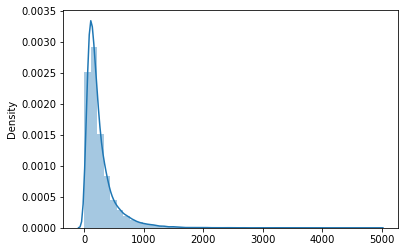

In [17]:
sns.distplot(data['duration'].values, bins=45)
pass

По графику видно, что с людьми диалог ведется не очень долго. 

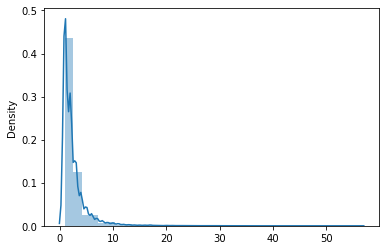

In [18]:
sns.distplot(data['campaign'].values, bins=35)
pass

Исходя из графика: во время маркетинговой кампании с одним и тем же человеком связывались в основном менее 6 раз.

### Обработка категориальных признаков

In [169]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'y']


Уберем выходной столбец **y**.

In [170]:
numerical_columns = numerical_columns[:len(numerical_columns)-1]

In [171]:
print(numerical_columns)

['age', 'duration', 'campaign', 'pdays', 'previous']


In [172]:
for c in categorical_columns:
    print(c, data[c].unique())

job ['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student', ..., 'self-employed', 'management', 'unemployed', 'unknown', 'housemaid']
Length: 12
Categories (12, object): ['blue-collar', 'entrepreneur', 'retired', 'admin.', ..., 'management', 'unemployed', 'unknown', 'housemaid']
marital ['married', 'divorced', 'single', 'unknown']
Categories (4, object): ['married', 'divorced', 'single', 'unknown']
education ['basic.9y', 'university.degree', 'basic.4y', 'high.school', 'professional.course', 'unknown', 'basic.6y', 'illiterate']
Categories (8, object): ['basic.9y', 'university.degree', 'basic.4y', 'high.school', 'professional.course', 'unknown', 'basic.6y', 'illiterate']
default ['unknown', 'no', 'yes']
Categories (3, object): ['unknown', 'no', 'yes']
housing ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'yes', 'unknown']
loan ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'yes', 'unknown']
contact ['cellular', 'telephone']
Categories (2, object): ['cellular', 

In [173]:
data_describe = data.describe(include = ['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['contact'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']


In [174]:
data['contact'].unique()

['cellular', 'telephone']
Categories (2, object): ['cellular', 'telephone']

In [175]:
data['contact'] = data['contact'].astype(object)
data.at[data['contact'] == 'cellular', 'contact'] = 0
data.at[data['contact'] == 'telephone', 'contact'] = 1
data['contact'].describe()

count     32950
unique        2
top           0
freq      20908
Name: contact, dtype: int64

In [176]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_succes

In [177]:
data[nonbinary_columns]

,job,marital,education,default,housing,loan,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,unknown,no,no,nov,wed,nonexistent
1,entrepreneur,married,university.degree,no,no,no,nov,wed,failure
2,retired,married,basic.4y,no,no,no,jul,mon,nonexistent
3,admin.,married,university.degree,no,yes,no,may,mon,nonexistent
4,retired,divorced,university.degree,no,no,no,jun,tue,nonexistent
...,...,...,...,...,...,...,...,...,...
32945,services,single,high.school,no,yes,no,jul,tue,nonexistent
32946,technician,married,professional.course,no,yes,no,nov,fri,failure
32947,admin.,married,basic.9y,no,no,yes,jul,mon,nonexistent
32948,admin.,married,university.degree,no,no,no,may,fri,nonexistent


In [178]:
print(data_nonbinary.head())

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                1                 0              0   
1           0                0                 1              0   
2           0                0                 0              0   
3           1                0                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             0            0   
2               0            1                  0             0            0   
3               0            0                  0             0            0   
4               0            1                  0             0            0   

   job_technician  ...  month_oct  month_sep  day_of_week_fri  \
0               0  ...          0          0       

In [179]:
len(data_nonbinary.columns)

51

### Нормализация количественных признаков

In [180]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Для лучшей работы многих алгоритмов машинного обучений необходима **нормализация** данных. Воспользуемся стандартным способом - линейным преобразованием, приводящем все значения к нулевому среднему и единичному среднеквадратичному отклонению.

In [181]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,duration,campaign,pdays,previous
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,3.030521e-16,-1.248841e-16,-4.172434e-17,-5.260654e-16,-6.963642e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.212122e+00,-9.967238e-01,-5.670139e-01,-5.118632e+00,-3.501216e-01
25%,-7.703184e-01,-5.990034e-01,-5.670139e-01,1.965809e-01,-3.501216e-01
50%,-1.935970e-01,-3.016785e-01,-2.036848e-01,1.965809e-01,-3.501216e-01
75%,6.714852e-01,2.350509e-01,1.596443e-01,1.965809e-01,-3.501216e-01
max,5.573617e+00,1.799346e+01,1.941609e+01,1.965809e-01,1.367724e+01


### Подготовка данных

In [182]:
data_numerical.describe()

,age,duration,campaign,pdays,previous
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,3.030521e-16,-1.248841e-16,-4.172434e-17,-5.260654e-16,-6.963642e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.212122e+00,-9.967238e-01,-5.670139e-01,-5.118632e+00,-3.501216e-01
25%,-7.703184e-01,-5.990034e-01,-5.670139e-01,1.965809e-01,-3.501216e-01
50%,-1.935970e-01,-3.016785e-01,-2.036848e-01,1.965809e-01,-3.501216e-01
75%,6.714852e-01,2.350509e-01,1.596443e-01,1.965809e-01,-3.501216e-01
max,5.573617e+00,1.799346e+01,1.941609e+01,1.965809e-01,1.367724e+01


In [183]:
data_nonbinary.describe()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,0.252322,0.225827,0.035205,0.025948,0.071168,0.041457,0.033354,0.096995,0.021578,0.163885,...,0.017815,0.014082,0.191866,0.206737,0.208103,0.195569,0.197724,0.104067,0.862398,0.033536
std,0.434351,0.418132,0.184300,0.158984,0.257110,0.199347,0.179561,0.295956,0.145304,0.370177,...,0.132280,0.117831,0.393775,0.404972,0.405957,0.396644,0.398289,0.305352,0.344487,0.180033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
data[binary_columns].describe()

,contact
count,32950
unique,2
top,0
freq,20908


#### Объединим все таблицы в одну

In [185]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data['y']), axis = 1)

In [186]:
data.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact,y
0,0.863726,-0.120194,0.522973,0.196581,-0.350122,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,no
1,-0.289717,-0.216729,-0.203685,0.196581,1.653788,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,no
2,3.651213,3.436121,-0.567014,0.196581,-0.350122,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,yes
3,-0.385837,-0.533360,-0.203685,0.196581,-0.350122,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,no
4,1.824928,0.424258,-0.203685,0.196581,-0.350122,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,no


In [187]:
data.describe()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,3.030521e-16,-1.248841e-16,-4.172434e-17,-5.260654e-16,-6.963642e-16,0.252322,0.225827,0.035205,0.025948,0.071168,...,0.017815,0.014082,0.191866,0.206737,0.208103,0.195569,0.197724,0.104067,0.862398,0.033536
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.434351,0.418132,0.184300,0.158984,0.257110,...,0.132280,0.117831,0.393775,0.404972,0.405957,0.396644,0.398289,0.305352,0.344487,0.180033
min,-2.212122e+00,-9.967238e-01,-5.670139e-01,-5.118632e+00,-3.501216e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.703184e-01,-5.990034e-01,-5.670139e-01,1.965809e-01,-3.501216e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.935970e-01,-3.016785e-01,-2.036848e-01,1.965809e-01,-3.501216e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.714852e-01,2.350509e-01,1.596443e-01,1.965809e-01,-3.501216e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.573617e+00,1.799346e+01,1.941609e+01,1.965809e-01,1.367724e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
for column in data.columns:
    print(column)

age
duration
campaign
pdays
previous
job_admin.
job_blue-collar
job_entrepreneur
job_housemaid
job_management
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_divorced
marital_married
marital_single
marital_unknown
education_basic.4y
education_basic.6y
education_basic.9y
education_high.school
education_illiterate
education_professional.course
education_university.degree
education_unknown
default_no
default_unknown
default_yes
housing_no
housing_unknown
housing_yes
loan_no
loan_unknown
loan_yes
month_apr
month_aug
month_dec
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
day_of_week_fri
day_of_week_mon
day_of_week_thu
day_of_week_tue
day_of_week_wed
poutcome_failure
poutcome_nonexistent
poutcome_success
contact
y


In [189]:
X = data.drop('y', axis = 1)
y = data['y']
feature_names = X.columns

In [191]:
print(feature_names)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       '

### Разбиваем данные на обучающую и тестовую выборки

In [192]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

N_train, N_test

(24712, 8238)

#### Импортируем необходимые модули

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble

### kNN - метод k ближайших соседей

#### 1 сосед

In [197]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=1)
Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.12478756979849479


#### 2 соседа

In [198]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=2)
Ошибка на обучающей выборке:  0.06883295564907738
Ошибка на тестовой выборке:  0.10937120660354455


#### 3 соседа

In [199]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=3)
Ошибка на обучающей выборке:  0.06490773713175785
Ошибка на тестовой выборке:  0.1065792668123331


#### 5 соседей

In [200]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier()
Ошибка на обучающей выборке:  0.07583360310780188
Ошибка на тестовой выборке:  0.10718621024520515


#### 8 соседей

In [201]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=8)
Ошибка на обучающей выборке:  0.08651667206215603
Ошибка на тестовой выборке:  0.1045156591405681


#### 13 соседей

In [202]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=13)
Ошибка на обучающей выборке:  0.08849951440595662
Ошибка на тестовой выборке:  0.1023306627822287


#### 21 сосед

In [203]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=21)
Ошибка на обучающей выборке:  0.09189867270961476
Ошибка на тестовой выборке:  0.10063122117018694


#### 34 соседа

In [204]:
knn = KNeighborsClassifier(n_neighbors = 34)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=34)
Ошибка на обучающей выборке:  0.09376011654257041
Ошибка на тестовой выборке:  0.10208788540907987


#### Попробуем найти оптимальное решение

In [206]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 35)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Кросс-валидационная ошибка: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Кросс-валидационная ошибка:  0.0967548302366934
Оптимальное количество соседей:  11


In [207]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
print(knn)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=11)
Ошибка на обучающей выборке:  0.08716413078666235
Ошибка на тестовой выборке:  0.10403010439427045


### Support Vector Machine

In [208]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.09525736484299126
Ошибка на тестовой выборке:  0.10524399126001456


### Random Forest

In [209]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.10087399854333576


### Extremely Randomized Trees

In [212]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.10852148579752367


### AdaBoost

In [210]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.09214146973130463
Ошибка на тестовой выборке:  0.10014566642388929


### GBT

In [214]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.08182259630948527
Ошибка на тестовой выборке:  0.09444039815489197


## Выводы

### По выборке

> * Выборка является **несбалансированной** (11/89)
> * Основную массу составляют люди возраста от 20 до 60 лет
> * Диалоги с людьми в общей массе являются недолгими (порядка ~ 8 минут)
> * В процессе маркетинговой кампании с одним и тем же человеком связывались в основном менее 6 раз


### По результатам классификации

> * Алгоритм **kNN** оптимальное количество соседей составило 11 с ошибкой на обучающей выборке ~ 8.7% и с ошибкой на тестовой выборке ~ 10% 
> * Алгоритм **Random Forest**: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 10%
> * Алгоритм **Extremely Randomized Trees**: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 10.8%
> * Алгоритм **AdaBoost**: ошибка на обучающей выборке - 9.2%, ошибка на тестовой выборке ~ 10%
> * Алгоритм **GBT**: ошибка на обучающей выборке - 8.1%, ошибка на тестовой выборке ~ 9.4%
> * Лучше всех себя показал алгоритм **GBT**, так как имеет наименьшую ошибку на тестовой выборке (~ 9.4%) и оптимальную на обучающей (~ 8.1%)
> * Возможно есть более оптимальные параметры для алгоритмов **Random Forest**, **Extremely Randomized Trees**, **AdaBoost** и **GBT**, в результате чего результат, возможно, может быть лучше
